<a href="https://colab.research.google.com/github/Jwilson1172/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:

# find the variance of the input array
def varr(ln:np.array):
  n=len(ln)
  mean=sum(ln)/n
  distance= ln - mean
  distance_squared= distance**2
  return sum(distance_squared)/(n-1)

# function that returns the std from varr
def std_f(data):
  return varr(data)**0.5


In [15]:
sales=np.array([3500,2400,3027,2798,3700,3250,2689])
print(f"Mean:{sum(sales)/len(sales)}")
print(f"variance:{varr(sales)}")
print(f"Standard deviation:{std_f(sales)}")

Mean:3052.0
variance:213637.66666666666
Standard deviation:462.2095484373583


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# function to calulate covariance
def covarr(col1, col2):
  return df[col1].cov(df[col2])

# funtion to calulate correlation from covariance
def corr(col1, col2):
  cov = covarr(col1,col2)
  return cov / ((std_f(df[col1]))*(std_f(df[col2])))


In [32]:
customers=np.array([127,80,105,92,120,115,93])
df=pd.DataFrame()
df["sales"]=sales
df["customers"]=customers

print(f"Calculated: {covarr('sales','customers')}\npandas:\n{df.cov()}")



Calculated: 7585.666666666666
pandas:
                   sales    customers
sales      213637.666667  7585.666667
customers    7585.666667   290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [31]:
print(f"Calulated:\n{corr('sales','customers')}\npandas:\n{df.corr()}")


Calulated:
0.9621524366368894
pandas:
              sales  customers
sales      1.000000   0.962152
customers  0.962152   1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [37]:
t_df=pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")
t_df=t_df.drop("Unnamed: 0",axis=1)
t_df.head()
print(t_df.corr())
print(t_df.cov())

                    pclass  survived  ...      body  has_cabin_number
pclass            1.000000 -0.312469  ... -0.034642         -0.713857
survived         -0.312469  1.000000  ...       NaN          0.302250
age              -0.366370 -0.050199  ...  0.059059          0.271887
sibsp             0.060832 -0.027825  ... -0.099961         -0.009064
parch             0.018322  0.082660  ...  0.051099          0.036806
fare             -0.558629  0.244265  ... -0.043110          0.507253
body             -0.034642       NaN  ...  1.000000          0.083796
has_cabin_number -0.713857  0.302250  ...  0.083796          1.000000

[8 rows x 8 columns]
                     pclass  survived  ...         body  has_cabin_number
pclass             0.701969 -0.127248  ...    -2.876653         -0.249992
survived          -0.127248  0.236250  ...     0.000000          0.061406
age               -3.954605 -0.314343  ...    81.622922          1.463138
sibsp              0.053090 -0.014088  ...    -8.708

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

####The synonym for orthogonal is perpendicular

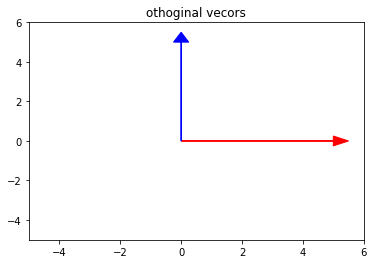

In [42]:
v1=[5,0]
v2=[0,5]

plt.arrow(0,0,v1[0],v1[1],color='red',head_width=.5, head_length=0.5)
plt.arrow(0,0,v2[0],v2[1],color='blue',head_width=.5, head_length=0.5)
plt.xlim(-5,6)
plt.ylim(-5,6)
plt.title("othoginal vecors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

####By definiton orthogonal vectors have a dot product of 0, so these are not orthogonal

In [45]:
v1=[-5,3,7]
v2=[6,-8,2]
np.dot(v1,v2)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [49]:
c=np.array([2,-15,6,20])
print(f"Norm^2:{np.linalg.norm(c)**2}")
print(f"dot product:{np.dot(c,c)}")
print(f"transposed product:{np.dot(c.T,c)}")


Norm^2:665.0
dot product:665
transposed product:665


###answer:they all have the same value

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


$||d|| = \sqrt{7^2 + 12^2} = \sqrt{49+144} = \sqrt{193}=13.8\bar{9}$

$\hat{d}= \frac{1}{||d||}d = \frac{1}{13.98}\begin{bmatrix} 7 \\ 12 \end{bmatrix} = \begin{bmatrix}\frac{7}{13.98} \\ \frac{12}{13.98} \end{bmatrix}$



$||e|| = \sqrt{2^2+11^2-8^2} = \sqrt{4+121+64} = \sqrt{189}=13.7\bar{4}$

$\hat{e} = \frac{1}{||e||}e = \frac{1}{13.74}\begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = \begin{bmatrix}\frac{2}{13.74} \\ \frac{11}{13.74} \\ \frac{-8}{13.74} \end{bmatrix}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [62]:
f=[4,12,11,9,2]
norm=np.linalg.norm(f)
k=[x/norm for x in f ]
print(k)

[0.20908334939572668, 0.62725004818718, 0.5749792108382483, 0.470437536140385, 0.10454167469786334]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

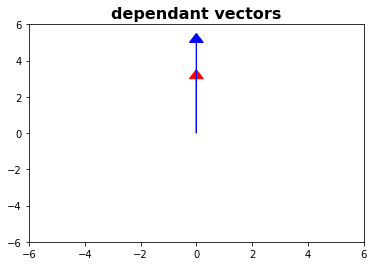

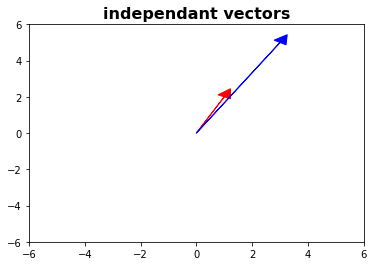

In [67]:
v1=[0,3]
v2=[0,5]
plt.arrow(0,0,v1[0],v1[1],color='red',head_width=0.5, head_length=0.5)
plt.arrow(0,0,v2[0],v2[1],color='blue',head_width=0.5, head_length=0.5)
plt.title("dependant vectors",fontweight='bold',fontsize=16)
plt.ylim(-6,6)
plt.xlim(-6,6)
plt.show()

v1=[1,2]
v2=[3,5]
plt.arrow(0,0,v1[0],v1[1],color='red',head_width=0.5, head_length=0.5)
plt.arrow(0,0,v2[0],v2[1],color='blue',head_width=0.5, head_length=0.5)
plt.title("independant vectors",fontweight='bold',fontsize=16)
plt.ylim(-6,6)
plt.xlim(-6,6)
plt.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

the vectors have a span of all numbers ona  two dimentional plane

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

the span of lmn have a span of all points in a 3d space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



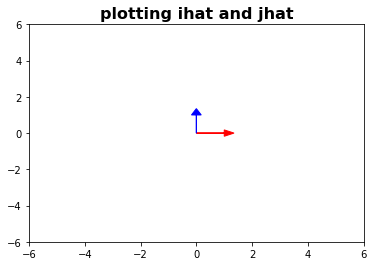

In [70]:
v1=[1,0]
v2=[0,1]

plt.arrow(0,0,v1[0],v1[1],color='red',head_width=0.35, head_length=0.35)
plt.arrow(0,0,v2[0],v2[1],color='blue',head_width=0.35, head_length=0.35)
plt.title("plotting ihat and jhat",fontweight='bold',fontsize=16)
plt.ylim(-6,6)
plt.xlim(-6,6)
plt.show()


## 6.2 What does it mean to form a basis?

## to form a basis is to find every point on a particular plane that those vectors live in.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

##the apperent rank of matrix P is 3 ranks

## 7.2 What does the rank of a matrix tell us?


##Answer: weither or not there are redundant columns in the matrix

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

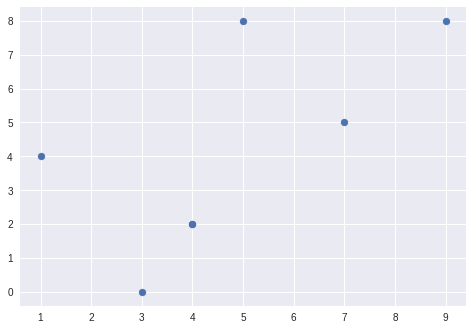

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [77]:

v=[1,3]
w=[-1,2]
w_v=np.dot(w,v)
v_v=np.dot(v,v)
frac=w_v/v_v
projection=np.multiply(frac,v)
print(projection)

[0.5 1.5]


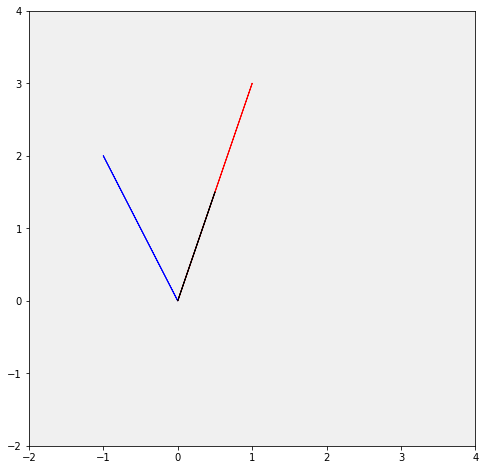

In [82]:
plt.rcParams['figure.figsize']=[8,8]
plt.rcParams['axes.facecolor']='#F0F0F0'
ax,fig=plt.subplots()

plt.xlim(-2,4)
plt.ylim(-2,4)
plt.arrow(0,0,v[0],v[1],color='r')
plt.arrow(0,0,w[0],w[1],color='blue')
plt.arrow(0,0,projection[0],projection[1],color='black')


plt.show()